In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, train_test_split, cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.utils.multiclass import type_of_target
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn import tree
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, plot_confusion_matrix
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier

In [8]:
bank_data = pd.read_csv("BankChurners.csv").drop(columns = ['CLIENTNUM'])

#Transfer card category to integers, because there is a hierarical relationship
card_cate_map = {'Blue': 0, 'Silver': 1, 'Gold':2, 'Platinum': 3}
for i in range(len(bank_data['Card_Category'])):
    for j in card_cate_map:
        if bank_data['Card_Category'][i] == j:
            bank_data.at[i, 'Card_Category'] = card_cate_map[j]       

#Transfer education category to integers, because there is a hierarical relationship
education_cate_map = {'Unknown':-1,'Uneducated':0,'High School':1,'College':2,'Graduate':3,'Post-Graduate':4, 'Doctorate':5 }
for i in range(len(bank_data['Education_Level'])):
    for j in education_cate_map:
        if bank_data['Education_Level'][i] == j:
            bank_data.at[i, 'Education_Level'] = education_cate_map[j]

income_cate_map = {'Unknown': -1, 'Less than $40K': 0, '$40K - $60K': 1, '$60K - $80K': 2, '$80K - $120K':3, '$120K +': 4}
for i in range(len(bank_data['Income_Category'])):
    for j in income_cate_map:
        if bank_data['Income_Category'][i] == j:
            bank_data.at[i, 'Income_Category'] = income_cate_map[j]
            
attrition_flag_map = {'Existing Customer': 0, 'Attrited Customer': 1}
for i in range(len(bank_data['Attrition_Flag'])):
    for j in attrition_flag_map:
        if bank_data['Attrition_Flag'][i] == j:
            bank_data.at[i, 'Attrition_Flag'] = attrition_flag_map[j]
            
data = pd.get_dummies(bank_data, columns = ['Gender','Marital_Status'])
data = data.dropna()
data

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,0,45,3,1,2,0,39,5,1,3,...,1144,42,1.625,0.061,0,1,0,1,0,0
1,0,49,5,3,0,0,44,6,1,2,...,1291,33,3.714,0.105,1,0,0,0,1,0
2,0,51,3,3,3,0,36,4,1,0,...,1887,20,2.333,0.000,0,1,0,1,0,0
3,0,40,4,1,0,0,34,3,4,1,...,1171,20,2.333,0.760,1,0,0,0,0,1
4,0,40,3,0,2,0,21,5,1,0,...,816,28,2.500,0.000,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,2,3,1,0,40,3,2,3,...,15476,117,0.857,0.462,0,1,0,0,1,0
10123,1,41,2,-1,1,0,25,4,2,3,...,8764,69,0.683,0.511,0,1,1,0,0,0
10124,1,44,1,1,0,0,36,5,3,4,...,10291,60,0.818,0.000,1,0,0,1,0,0
10125,1,30,2,3,1,0,36,4,3,3,...,8395,62,0.722,0.000,0,1,0,0,0,1


In [9]:
data = data.to_numpy()
data

array([[0, 45, 3, ..., 1, 0, 0],
       [0, 49, 5, ..., 0, 1, 0],
       [0, 51, 3, ..., 1, 0, 0],
       ...,
       [1, 44, 1, ..., 1, 0, 0],
       [1, 30, 2, ..., 0, 0, 1],
       [1, 43, 2, ..., 1, 0, 0]], dtype=object)

In [10]:
X = data[:, 1:]
y = data[:, 0]

# Use LabelEncoder to transform target values into integers.
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

print(type_of_target(y))
print(y)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

binary
[0 0 0 ... 1 1 1]


In [11]:
# Preprocess the data with the StandardScalar
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

# Removes highly correlated data
X = pd.DataFrame(X)
cor_matrix = X.corr().abs()
# Select upper triangle of correlation matrix
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]
print("There are " + str(len(to_drop)) + " columns to be dropped")
X = X.drop(X.columns[to_drop], axis = 1)

There are 2 columns to be dropped


The model running is: DecisionTreeClassifier()


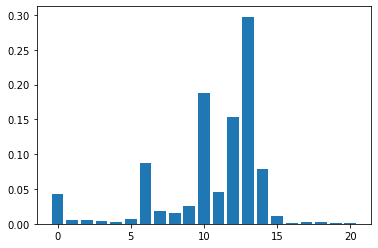

{'Decision Tree Feature': {'Feature 13': 0.2975515661282856}}
The mean accuracy of  Decision Tree  is:  0.935913324314772  and the standard deviation is:  0.0054193042474068335
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      8500
           1       0.81      0.81      0.81      1627

    accuracy                           0.94     10127
   macro avg       0.89      0.89      0.89     10127
weighted avg       0.94      0.94      0.94     10127

                 Predicted Negative  Predicted Positive
Actual Negative                8185                 315
Actual Positive                 312                1315

The FN is  312
The tn is  8185
The tp is  1315
The fp is  315

The precision is:  0.8067484662576687
The recall is:  0.8082360172095882
The f1 score is:  0.8074915566472214
Area under the Receiver Operating Characteristic curve: 0.8855885968400881


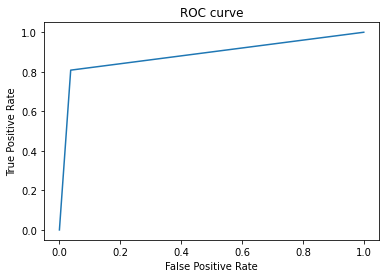


The model running is: SVC(C=2.0, kernel='linear')
{'Decision Tree Feature': {'Feature 13': 0.2975515661282856}}
The mean accuracy of  SVM Linear  is:  0.90549946985485  and the standard deviation is:  0.0030577369243179786


In [ ]:
feature_dict={}
high_low_dict = {}
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()
    
def feature_importance(model):
    model.fit(X, y)
    temp_dict={}
    if "AdaBoost" in str(model):
        importance = model.feature_importances_
        for i,v in enumerate(importance):
            temp_dict['Feature ' + str(i)] = v
            feature_dict['AdaBoost Feature'] = temp_dict
        plt.bar([x for x in range(len(importance))], importance)
        plt.show()
    if "RandomForest" in str(model):
        importance = model.feature_importances_
        for i,v in enumerate(importance):
            temp_dict['Feature ' + str(i)] = v
            feature_dict['Random Forest Feature'] = temp_dict
        plt.bar([x for x in range(len(importance))], importance)
        plt.show()
    if "DecisionTree" in str(model):
        importance = model.feature_importances_
        for i,v in enumerate(importance):
            temp_dict['Feature ' + str(i)] = v
            feature_dict['Decision Tree Feature'] = temp_dict
        plt.bar([x for x in range(len(importance))], importance)
        plt.show()
#             print('Feature: %0d, Score: %.5f' % (i,v))
#         print(feature_dict)
        # plot feature importance
    
#     high_low_feature(feature_dict)


def high_low_feature(feature_dict):
    final_dict={}
    for i in feature_dict:
        temp_dict={}
        max_key = max(feature_dict[i], key=feature_dict[i].get)
        max_value = max(feature_dict[i].values())
        temp_dict[max_key] = max_value
        final_dict[i] = temp_dict
    print(final_dict)

# define the scoring method
scoring = 'accuracy'

# define models to train
names = ['Decision Tree',
         'SVM Linear',
#          'SVM RBF', 
#          'SVM Sigmoid'
        'BaggingClassifier',
        'RandomForest',
        'Adaboost'
        ]

# build classifiers
classifiers = [
    tree.DecisionTreeClassifier(),
    SVC(kernel='linear', C = 2.0, gamma='scale'),
#     SVC(kernel='rbf', C = 2.0, gamma='scale'),
#     SVC(kernel='sigmoid', C = 2.0, gamma='scale'),
    BaggingClassifier(n_estimators=200, oob_score = True),
    RandomForestClassifier(n_estimators=200, max_features = "sqrt", oob_score = True),
    AdaBoostClassifier(n_estimators=200, learning_rate = 0.3)
]

models = zip(names, classifiers)

# evaluate each model in turn
results = []
#results_2 = []
#results_3 = []
names = []


for name, model in models:
    ## Use stratified k-fold cross validation to deal with imbalanced data
    names.append(name)
    print("The model running is: " + str(model))
#     print("type", str(type(model)))
    kfold = StratifiedKFold(n_splits=5, shuffle=True)
#   Test the stratified k-fold cross-validation:
#     for train_index, test_index in kfold.split(X, y):
#         print("TRAIN:", len(train_index), "TEST:", len(test_index))
    feature_importance(model)
    high_low_feature(feature_dict)
    scores = cross_val_score(model, X, y, cv = kfold)
    results.append((scores.mean(), scores.std()))
    print("The mean accuracy of ", name, " is: ", scores.mean(), " and the standard deviation is: ", scores.std())
    y_pred = cross_val_predict(model, X, y, cv=kfold)
    print(classification_report(y, y_pred))
    
    confusion_mat = confusion_matrix(y, y_pred)
    graph = pd.DataFrame(confusion_mat, 
             columns=['Predicted Negative', 'Predicted Positive'], 
             index=['Actual Negative', 'Actual Positive'])
    
    print(graph)
    print()
    fn = confusion_mat[1][0]
    tn = confusion_mat[0][0]
    tp = confusion_mat[1][1]
    fp = confusion_mat[0][1] 
    
    print("The FN is ", fn)
    print("The tn is ", tn)
    print("The tp is ", tp)
    print("The fp is ", fp)
    
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * (precision * recall / (precision + recall))
    
    print()
    print("The precision is: ", precision)
    print("The recall is: ", recall)
    print("The f1 score is: ", f1_score)

    print('Area under the Receiver Operating Characteristic curve:', str(roc_auc_score(y, y_pred)))
    fpr, tpr, thresholds = roc_curve(y, y_pred)
    plt.plot(fpr, tpr)
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    print()

#     cv_results_1 = cross_val_score(model, X_train_1, y_train_1, cv=kfold, scoring=scoring)
#     #cv_results_2 = cross_val_score(model, X_train_2, y_train_2, cv=kfold, scoring=scoring)
#     #cv_results_3 = cross_val_score(model, X_train_3, y_train_3, cv=kfold, scoring=scoring)
#     results_1.append(cv_results_1)
#     #results_2.append(cv_results_2)
#     #results_3.append(cv_results_3)
#     names.append(name)
#     #msg = '{0}:\nPreprocess 1: {1}  ({2})\nPreprocess 2: {3}  ({4})\nPreprocess 3: {5}  ({6})'.format(name, cv_results_1.mean(), cv_results_1.std(), cv_results_2.mean(), cv_results_2.std(), cv_results_3.mean(), cv_results_3.std())
#     msg = '{0}:\nPreprocess 1: {1}  ({2})'.format(name, cv_results_1.mean(), cv_results_1.std())
#     print(msg)



        

In [ ]:
# Try SVC 
# cv = StratifiedKFold(n_splits=5, shuffle=True)
# clf = SVC(kernel='linear')
# scores = cross_val_score(clf, X, y, cv = cv)
# print("Linear Kernel function %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
# y_pred = cross_val_predict(clf, X, y, cv=kfold)
# print(classification_report(y, y_pred))
# confusion_mat = confusion_matrix(y, y_pred)
# graph = pd.DataFrame(confusion_mat, 
#              columns=['Predicted Negative', 'Predicted Positive'], 
#              index=['Actual Negative', 'Actual Positive'])
    
# print(graph)
# print()
# fn = confusion_mat[1][0]
# tn = confusion_mat[0][0]
# tp = confusion_mat[1][1]
# fp = confusion_mat[0][1] 
    
# print("The FN is ", fn)
# print("The tn is ", tn)
# print("The tp is ", tp)
# print("The fp is ", fp)
    
# precision = tp / (tp + fp)
# recall = tp / (tp + fn)
# f1_score = 2 * (precision * recall / (precision + recall))
    
# print()
# print("The precision is: ", precision)
# print("The recall is: ", recall)
# print("The f1 score is: ", f1_score)

# print('Area under the Receiver Operating Characteristic curve:', str(roc_auc_score(y, y_pred)))
# fpr, tpr, thresholds = roc_curve(y, y_pred)
# plt.plot(fpr, tpr)
# plt.title('ROC curve')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# print()

In [ ]:
#Try BaggingClassifier
# cv = StratifiedKFold(n_splits=5, shuffle=True)
# clf = BaggingClassifier(n_estimators=200, oob_score = True)
# clf.fit(X,y)
# scores = cross_val_score(clf, X, y, cv = cv)
# print("Linear Kernel function %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
# y_pred = cross_val_predict(clf, X, y, cv=kfold)
# print(classification_report(y, y_pred))
# confusion_mat = confusion_matrix(y, y_pred)
# graph = pd.DataFrame(confusion_mat, 
#              columns=['Predicted Negative', 'Predicted Positive'], 
#              index=['Actual Negative', 'Actual Positive'])
    
# print(graph)
# print()
# fn = confusion_mat[1][0]
# tn = confusion_mat[0][0]
# tp = confusion_mat[1][1]
# fp = confusion_mat[0][1] 
    
# print("The FN is ", fn)
# print("The tn is ", tn)
# print("The tp is ", tp)
# print("The fp is ", fp)
    
# precision = tp / (tp + fp)
# recall = tp / (tp + fn)
# f1_score = 2 * (precision * recall / (precision + recall))
    
# print()
# print("The precision is: ", precision)
# print("The recall is: ", recall)
# print("The f1 score is: ", f1_score)

# print('Area under the Receiver Operating Characteristic curve:', str(roc_auc_score(y, y_pred)))
# fpr, tpr, thresholds = roc_curve(y, y_pred)
# plt.plot(fpr, tpr)
# plt.title('ROC curve')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# print()